<a href="https://colab.research.google.com/github/Amith1236/DTPIII/blob/main/DTP_Machine_Learning_for_Food_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model.

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5261_1&content_id=_184406_1).


In [ ]:
#inital imports

from typing import TypeAlias
from typing import Optional, Any

Number: TypeAlias = int | float

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from IPython.display import display

## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission

Student's Name:
- Name 1
- Name 2
- ...

### Problem Statement

Describe the problem statement

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

In [ ]:
###Testing Data with Outbound and Inbound against FBSI
# Step 1: Load and process df1 (Outbound Departures)
df1 = pd.read_csv("/content/datasets/OutboundDeparturesOfSingaporeResidentsByModeOfTransportMonthly.csv")
df1 = df1.transpose()
df1.reset_index(inplace=True)
df1.columns = df1.iloc[0]  # Set the first row as column headers
df1 = df1[1:]  # Remove the first row
df1.columns = df1.columns.str.strip()  # Remove extra spaces
df1 = df1[["DataSeries", "Total"]]  # Select relevant columns
df1 = df1.rename(columns={"Total": "TotalOutbound"})  # Rename column

# Convert "TotalOutbound" to numeric and handle non-numeric values
df1["TotalOutbound"] = pd.to_numeric(df1["TotalOutbound"], errors="coerce")
df1 = df1.fillna(df1["TotalOutbound"].mean())  # Replace NaNs with column mean
display(df1)

# Step 2: Load and process df2 (Inbound Tourism Markets)
df2 = pd.read_csv("/content/datasets/InternationalVisitorArrivalsByInboundTourismMarketsMonthly.csv")
df2 = df2.transpose()
df2.reset_index(inplace=True)
df2.columns = df2.iloc[0]  # Set the first row as headers
df2 = df2[1:]  # Remove the first row
df2.columns = df2.columns.str.strip()  # Clean up header names
df2 = df2.iloc[:165, 0:2]  # Limit to 165 rows and first 2 columns
df2 = df2.rename(columns={"Total International Visitor Arrivals By Inbound Tourism Markets": "TotalInbound"})  # Rename column
df2 = df2.drop(columns=["DataSeries"], errors="ignore")  # Drop "DataSeries" if present

# Convert "TotalInbound" to numeric and handle non-numeric values
df2["TotalInbound"] = pd.to_numeric(df2["TotalInbound"], errors="coerce")
df2 = df2.fillna(df2["TotalInbound"].mean())  # Replace NaNs with column mean
display(df2)

# Step 3: Load and process df3 (Food Beverage Services Index)
df3 = pd.read_csv("/content/datasets/FoodBeverageServicesIndex2017100AtCurrentPricesMonthly.csv")
df3 = df3.transpose()
df3.reset_index(inplace=True)
df3.columns = df3.iloc[0]  # Set the first row as headers
df3 = df3[1:]  # Remove the first row
df3.columns = df3.columns.str.strip()  # Clean up header names
df3 = df3.iloc[:165, 0:2]  # Limit to 165 rows and first 2 columns
df3 = df3.rename(columns={"Total": "FBSIndex"})  # Rename column
df3 = df3.drop(columns=["DataSeries"], errors="ignore")  # Drop "DataSeries" if present

# Convert "FBSIndex" to numeric and handle non-numeric values
df3["FBSIndex"] = pd.to_numeric(df3["FBSIndex"], errors="coerce")
df3 = df3.fillna(df3["FBSIndex"].mean())  # Replace NaNs with column mean
display(df3)

# Step 4: Concatenate all DataFrames
merged_df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True), df3.reset_index(drop=True)], axis=1)

# Display the final merged DataFrame
display(merged_df)


NameError: name 'pd' is not defined

### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [ ]:
# clean data


In [ ]:
# descriptive statistics

In [ ]:
# visualization with analysis

### Features and Target Preparation

Prepare features and target for model training.

In [ ]:
# put Python code to prepare your features and target

In [ ]:
#prepare features

def get_features_targets(df: pd.DataFrame,
                         feature_names: list[str],
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

#Split features and targets between test and training sets
def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame,
               random_state: Optional[int]=None,
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    if random_state is not None:
        np.random.seed(random_state)

    total_size = len(df_feature)
    test_data_size = int(total_size * test_size)

    test_indices = np.random.choice(df_feature.index, size=test_data_size, replace=False)

    df_feature_test = df_feature.loc[test_indices]
    df_feature_train = df_feature.drop(test_indices)

    df_target_test = df_target.loc[test_indices]
    df_target_train = df_target.drop(test_indices)

    return df_feature_train, df_feature_test, df_target_train, df_target_test


#normalise column of data
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray]=None,
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if columns_means is None:
        columns_means = np.mean(array, axis=0)
    if columns_stds is None:
        columns_stds = np.std(array, axis=0)

    #accounting for divide by 0 error
    columns_stds = np.where(columns_stds == 0, 1, columns_stds)

    out = (array - columns_means) / columns_stds

    return out, columns_means, columns_stds

### Building Model

Use python code to build your model. Give explanation on this process.

In [ ]:
# Essential Functions

#Cost Function
def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return np.matmul(X, beta)

def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    y_hat = calc_linreg(X, beta)
    m = X.shape[0]
    J = (1/(2*m))*calc_linreg((np.transpose(y_hat - y)), (y_hat - y))
    #print(f"J is {J}")
    return np.squeeze(J)

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    one_column = np.ones((np_feature.shape[0], 1))
    return np.concatenate((one_column, np_feature), axis=1)



#gradient descent
def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray,
                            alpha: float, num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    b_hat = beta
    m = X.shape[0]
    J_storage = np.array([compute_cost_linreg(X, y, beta)])
    for step in range(num_iters):
        b_hat -= (alpha / m) * np.matmul(np.transpose(X) ,(np.matmul(X, b_hat) - y))
        J = compute_cost_linreg(X, y, b_hat)
        J_storage = np.append(J_storage, J)
    return beta, J_storage

#Visualisation
def predict_linreg(array_feature: np.ndarray, beta: np.ndarray,
                   means: Optional[np.ndarray]=None,
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    df = pd.DataFrame(array_feature)
    norm_features, _, _ = normalize_z(df, means, stds)
    prepped_features = prepare_feature(norm_features)
    y_hat = calc_linreg(prepped_features, beta)
    return y_hat


In [ ]:
#Running the model

# get features and targets from data frame
df_feature, df_target = get_features_targets(merged_df, ["TotalOutbound", "TotalInbound"], ["FBSIndex"])

# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, 100, 0.3)

# normalize the feature using z normalization
array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())

X: np.ndarray = prepare_feature(array_feature_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((3,1))

print(X.shape)
print(target.shape)
print(beta.shape)

# call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred: np.ndarray = predict_linreg(df_feature_test.to_numpy(), beta, means, stds)

(116, 3)
(116, 1)
(3, 1)


Learned Beta Coefficients:
[[98.72577372]
 [ 4.95726581]
 [ 4.77937586]]


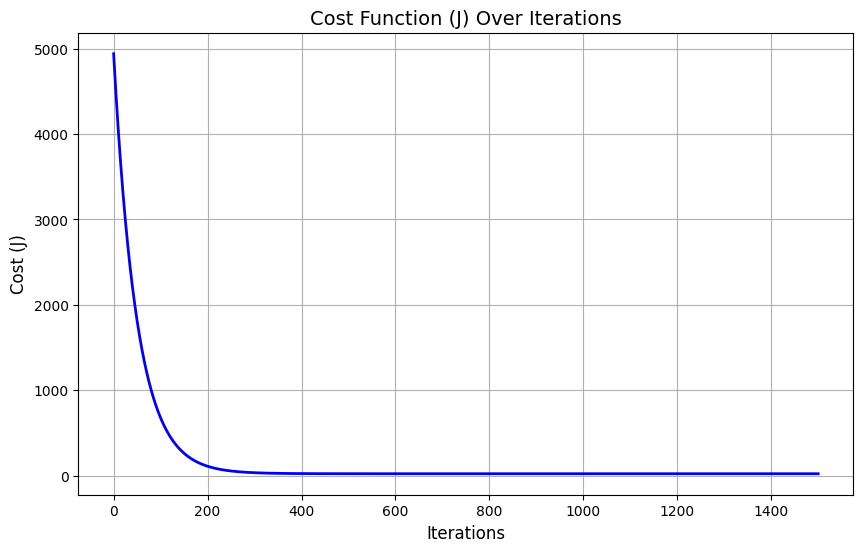

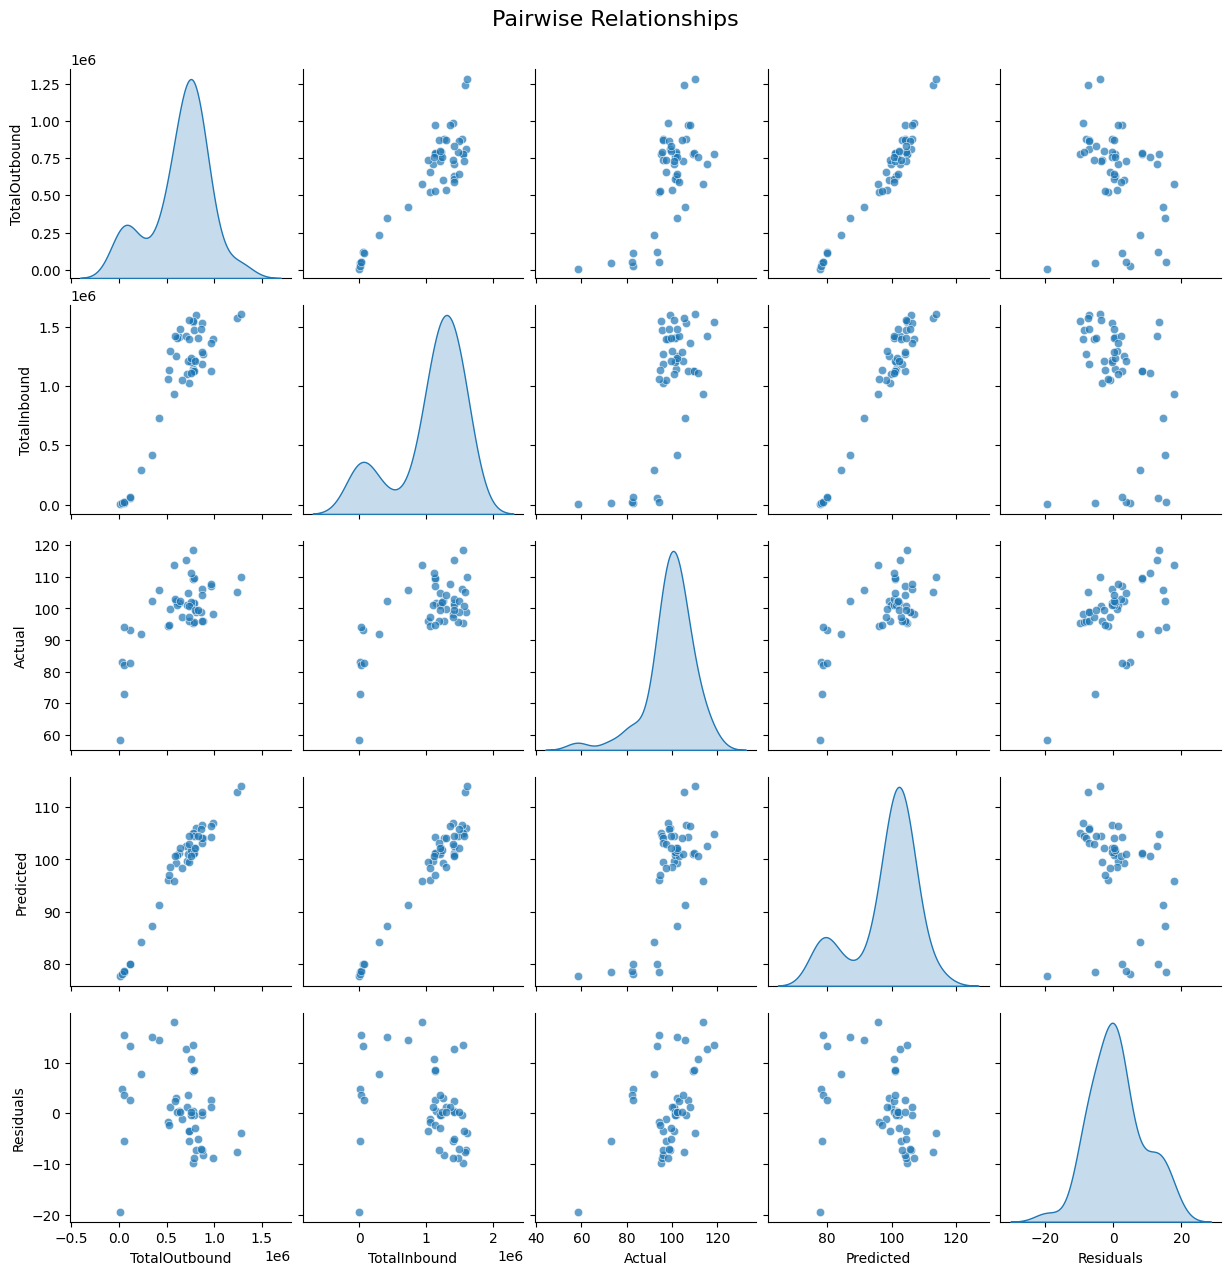

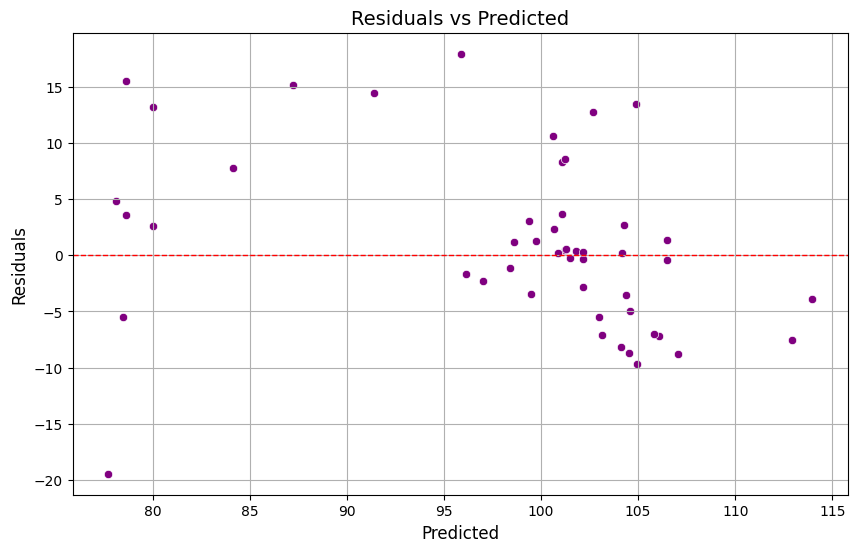

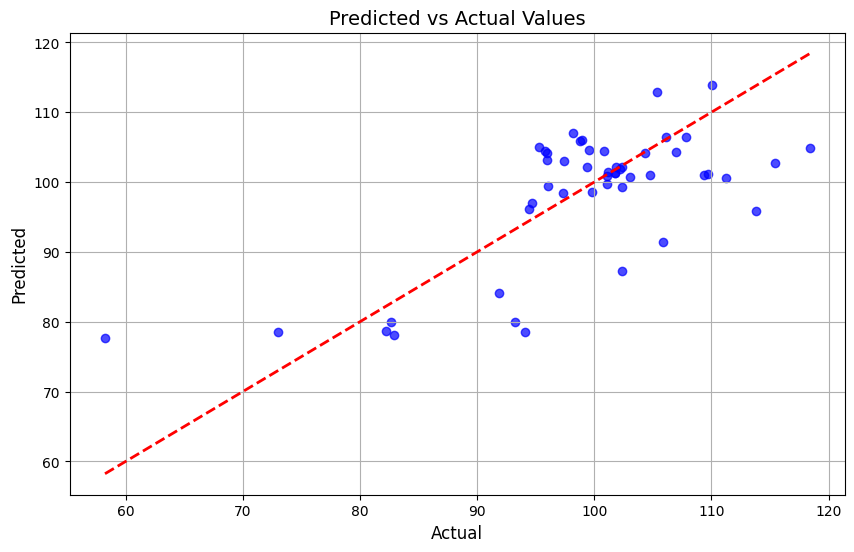

In [ ]:
# Print the learned beta coefficients
print("Learned Beta Coefficients:")
print(beta)

# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(J_storage, color='blue', linewidth=2)
plt.title("Cost Function (J) Over Iterations", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost (J)", fontsize=12)
plt.grid(True)
plt.show()

# Get predictions for the test set
y_hat_test = predict_linreg(df_feature_test.to_numpy(), beta, means, stds)

# Convert arrays to DataFrame for easier plotting
df_predictions = pd.DataFrame({
    "Actual": df_target_test.squeeze(),
    "Predicted": y_hat_test.squeeze(),
    "Residuals": df_target_test.squeeze() - y_hat_test.squeeze()
})
df_features = pd.DataFrame(df_feature_test, columns=["TotalOutbound", "TotalInbound"])

# Pairwise Plot: Features, Predictions, and Actual Target
sns.pairplot(pd.concat([df_features, df_predictions], axis=1),
             diag_kind='kde',
             plot_kws={"alpha": 0.7})
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)
plt.show()

# Residual Plot: Residuals vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_predictions["Predicted"], y=df_predictions["Residuals"], color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_predictions["Actual"], df_predictions["Predicted"], alpha=0.7, color='blue')
plt.plot([df_predictions["Actual"].min(), df_predictions["Actual"].max()],
         [df_predictions["Actual"].min(), df_predictions["Actual"].max()],
         color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
plt.grid(True)
plt.show()


### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

In [ ]:
# put Python code to test & evaluate the model

#r^2 score
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    mean = np.mean(y)
    SS_res = np.sum((y - ypred)**2)
    SS_tot = np.sum((y - mean)**2)
    r2 = 1 - SS_res/SS_tot
    return r2

def evaluate_model_metrics(y: np.ndarray, ypred: np.ndarray, n_features: int) -> dict:
    """
    Evaluates the performance of a regression model using multiple metrics.

    Args:
    y (np.ndarray): True target values.
    ypred (np.ndarray): Predicted target values.
    n_features (int): Number of independent variables (features).

    Returns:
    dict: Dictionary containing MSE, MAE, and Adjusted R².
    """
    # Mean Squared Error
    #https://www.sciencedirect.com/topics/engineering/mean-square-error
    mse = np.mean((y - ypred) ** 2)

    # Mean Absolute Error
    # Reference: https://www.sciencedirect.com/topics/engineering/mean-absolute-error
    mae = np.mean(np.abs(y - ypred))

    # Adjusted R²
    # Reference: https://www.datacamp.com/tutorial/adjusted-r-squared
    n = len(y)
    mean = np.mean(y)
    SS_res = np.sum((y - ypred) ** 2)
    SS_tot = np.sum((y - mean) ** 2)
    r2 = 1 - (SS_res / SS_tot)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))

    return {"MSE": mse, "MAE": mae, "Adjusted R²": adjusted_r2}

In [ ]:
# Number of features in your model
n_features = df_feature_train.shape[1]

# Evaluate metrics for training data
metrics = evaluate_model_metrics(df_target_train.to_numpy(), predict_linreg(df_feature_train.to_numpy(), beta, means, stds), n_features)
print("Training Metrics:", metrics)

# Evaluate metrics for test data
test_metrics = evaluate_model_metrics(df_target_test.to_numpy(), predict_linreg(df_feature_test.to_numpy(), beta, means, stds), n_features)
print("Test Metrics:", test_metrics)


Training Metrics: {'MSE': 46.746878393330846, 'MAE': 4.784505724958676, 'Adjusted R²': 0.6460237015186194}
Test Metrics: {'MSE': 60.44628241977456, 'MAE': 5.833474743311785, 'Adjusted R²': 0.39968964151696806}


### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

In [ ]:
# Re-iterate the steps above with improvement

In [ ]:
# prompt: give me a hyperparameter tuning algorithm loop base for different alphas and iterations making sure to split different proportions of data for each hyper test, and have a final training set, then a test set

# Hyperparameter Tuning Loop
alphas = [0.001, 0.01, 0.1]
iterations_list = [500, 1000, 1500]
train_proportions = [0.6, 0.7, 0.8]  # Different proportions for training data

best_alpha = None
best_iterations = None
best_train_proportion = None
best_r2 = -1  # Initialize with a low value

for alpha in alphas:
  for iterations in iterations_list:
    for train_proportion in train_proportions:
      # Split data into training, validation and testing sets
      df_feature_train_val, df_feature_test, df_target_train_val, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.2)  # 20% for testing

      train_size = int(len(df_feature_train_val) * train_proportion)

      df_feature_train = df_feature_train_val.iloc[:train_size]
      df_target_train = df_target_train_val.iloc[:train_size]

      df_feature_val = df_feature_train_val.iloc[train_size:]
      df_target_val = df_target_train_val.iloc[train_size:]

      # Normalize the feature using z normalization
      array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())

      X = prepare_feature(array_feature_train_z)
      target = df_target_train.to_numpy()

      beta = np.zeros((3, 1))

      # Train the model
      beta, _ = gradient_descent_linreg(X, target, beta, alpha, iterations)

      # Evaluate on the validation set
      y_hat_val = predict_linreg(df_feature_val.to_numpy(), beta, means, stds)
      r2 = r2_score(df_target_val.to_numpy(), y_hat_val)

      print(f"alpha: {alpha}, iterations:{iterations}, train_proportion: {train_proportion}, validation r2: {r2}")

      if r2 > best_r2:
        best_alpha = alpha
        best_iterations = iterations
        best_train_proportion = train_proportion
        best_r2 = r2

print(f"\nBest hyperparameters: alpha = {best_alpha}, iterations = {best_iterations}, train_proportion = {best_train_proportion}, r2 = {best_r2}")

# Final training with the best hyperparameters and combined train+val set
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.2)

array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())
X = prepare_feature(array_feature_train_z)
target = df_target_train.to_numpy()
beta = np.zeros((3, 1))
beta, _ = gradient_descent_linreg(X, target, beta, best_alpha, best_iterations)

# Test the final model
y_hat_test = predict_linreg(df_feature_test.to_numpy(), beta, means, stds)
final_r2 = r2_score(df_target_test.to_numpy(), y_hat_test)
print(f"\nFinal test R^2 with best hyperparameters: {final_r2}")

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion